<a href="https://colab.research.google.com/github/onecio/ProjetoT3_K-means/blob/main/projetot3_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB
None

Primeiras linhas do dataset:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.257178          -0.023285          -0.014654         -0.938404   
1           0.286027          -0.013163          -0.119083         -0.975415   
2           0.275485          -0.026050          -0.118152         -0.993819   
3           0.270298          -0.032614          -0.117520         -0.994743   
4           0.274833          -0.027848          -0.129527         -0.993852   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.920091         -0.667683         -0.952501         -0.925249   
1         -0.967458         -0.944958         -0.986799         -0.968401   
2         -0.969926         -0.962748 

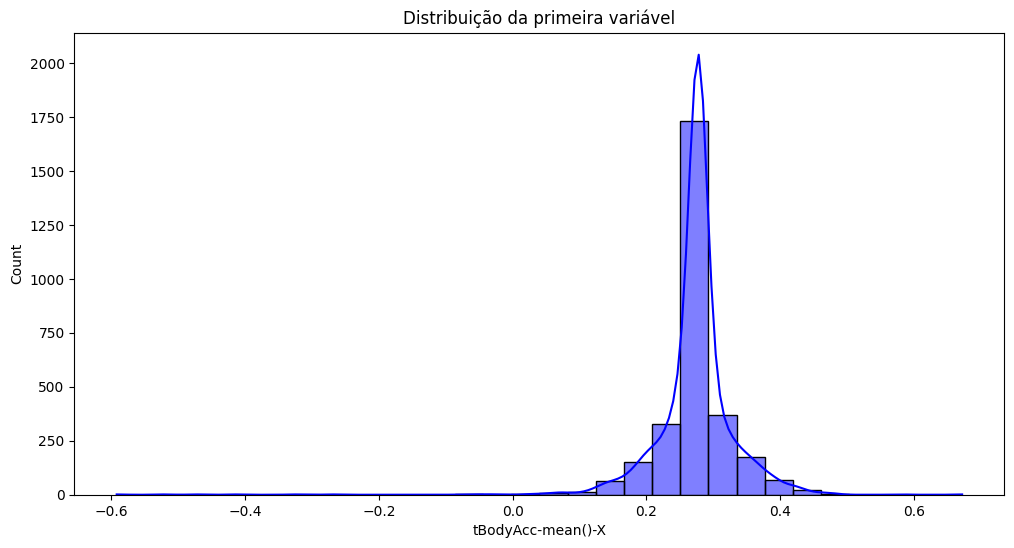

ValueError: could not convert string to float: 'STANDING'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Bibliotecas necessárias
# Instalando e importando bibliotecas essenciais
import numpy as np  # Manipulação numérica
import pandas as pd  # Manipulação de dados
import matplotlib.pyplot as plt  # Visualização de dados
import seaborn as sns  # Visualização avançada
from sklearn.cluster import KMeans  # Algoritmo de K-means
from sklearn.decomposition import PCA  # Redução de dimensionalidade
from sklearn.metrics import silhouette_score  # Avaliação de clusters
from sklearn.preprocessing import StandardScaler  # Normalização dos dados

# Carregar o dataset
# Lendo o arquivo CSV em um DataFrame Pandas
df = pd.read_csv("test.csv")

# Exploratory Data Analysis (EDA)
# Análise preliminar dos dados
print("Informações do dataset:")
print(df.info())  # Estrutura do dataset
print("\nPrimeiras linhas do dataset:")
print(df.head())  # Primeiras 5 linhas
print("\nDescrição estatística:")
print(df.describe())  # Estatísticas descritivas

# Verificando valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Distribuição de variáveis
# Visualização da distribuição de dados
plt.figure(figsize=(12, 6))
sns.histplot(df.iloc[:, 0], kde=True, color="blue", bins=30)
plt.title("Distribuição da primeira variável")
plt.show()

# Correlação entre variáveis
# Gera um mapa de calor para avaliar correlações
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

# Normalização dos dados
# Padroniza os dados para balancear a contribuição das variáveis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determinar o número ótimo de clusters
# Método do cotovelo (Elbow Method)
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualizando o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker="o", linestyle="--", color="blue")
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.show()

# Determinar o número ótimo de clusters
# Silhouette Score
silhouette_scores = []
for k in range(2, 11):  # Silhouette não funciona com k=1
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Visualizando o Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="--", color="green")
plt.title("Silhouette Score por Número de Clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

# Aplicação do K-means
# Utilizando o número ótimo de clusters identificado
optimal_k = 3  # Substitua pelo número identificado nos métodos acima
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionando os rótulos dos clusters ao DataFrame
df["Cluster"] = clusters

# Visualização com PCA (2D)
# Reduzindo a dimensionalidade para 2D para visualização
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Clusters Visualizados em 2D (PCA)")
plt.show()

# Análise de resultados
print("\nAvaliação dos clusters:")
print("Inércia final:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(df_scaled, clusters))